In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import appid

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Data Files/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_df = pd.read_csv(output_data_file)
weather_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
#Create a Data Frame to Hold Output Data
weather_output_df = pd.DataFrame(columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
weather_output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [4]:
#Perform API Calls

#Code from APIs Day 3 Activity 5, ShoutOut to Matt Johnson for Reminding Me to Remove the '==' and Start Filling an Empty DF
#Print Title
print('Beginning Data Retrieval')
print('--------------------------------')
#Iterate Through the Cities
for index, row in weather_df.iterrows():
    #Assign the Base URL
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    #Assign the Parameters
    params = {'q':cities[index], 'appid':appid, 'units':'imperial'}
    #Obtain the Response
    response = requests.get(base_url, params=params).json()
    #See if A Given City is in the List
    try:
        weather_output_df.loc[index, "City" ] = response['name']
        weather_output_df.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_output_df.loc[index, "Country"] = response['sys']['country']
        weather_output_df.loc[index, "Date"] = response['dt']
        weather_output_df.loc[index, "Humidity"] = response['main']['humidity']
        weather_output_df.loc[index, "Lat"] = response['coord']['lat']
        weather_output_df.loc[index, "Lng"] = response['coord']['lon']
        weather_output_df.loc[index, "Max Temp"] = response['main']['temp_max']
        weather_output_df.loc[index, "Wind Speed"] = response['wind']['speed']
        print(f"Processing record {index} | {cities[index]}")
    except (KeyError, IndexError):
        print("City not Found. Skipping...")
        
print('---------------------------------')
print('Data Retrieval Complete')
print('---------------------------------')

Beginning Data Retrieval
--------------------------------
Processing record 0 | san cristobal
Processing record 1 | ushuaia
Processing record 2 | albany
Processing record 3 | forssa
Processing record 4 | yellowknife
Processing record 5 | port alfred
Processing record 6 | vuktyl
Processing record 7 | grindavik
Processing record 8 | ormara
Processing record 9 | camacha
Processing record 10 | saskylakh
Processing record 11 | koboko
Processing record 12 | ballina
Processing record 13 | puerto ayora
Processing record 14 | meridian
Processing record 15 | khatanga
Processing record 16 | bambous virieux
Processing record 17 | talnakh
Processing record 18 | avarua
Processing record 19 | busselton
Processing record 20 | coquimbo
Processing record 21 | bethel
Processing record 22 | rikitea
Processing record 23 | tighina
Processing record 24 | new norfolk
Processing record 25 | east london
Processing record 26 | yining
Processing record 27 | bamako
Processing record 28 | punta arenas
Processing re

Processing record 252 | port lincoln
Processing record 253 | uruguaiana
Processing record 254 | simga
Processing record 255 | portland
Processing record 256 | ancud
Processing record 257 | touros
Processing record 258 | ponta do sol
Processing record 259 | gejiu
Processing record 260 | kupang
Processing record 261 | norman wells
Processing record 262 | fairbanks
Processing record 263 | charleston
Processing record 264 | anamur
Processing record 265 | port-gentil
Processing record 266 | volot
Processing record 267 | kaitangata
Processing record 268 | aras
Processing record 269 | kutum
Processing record 270 | soverato
Processing record 271 | sisimiut
Processing record 272 | los llanos de aridane
Processing record 273 | petropavlovsk-kamchatskiy
Processing record 274 | matadi
Processing record 275 | saint-paul
Processing record 276 | naze
City not Found. Skipping...
Processing record 278 | imbituba
Processing record 279 | pallasovka
Processing record 280 | berlevag
Processing record 281 |

Processing record 503 | sept-iles
Processing record 504 | high rock
Processing record 505 | sitka
Processing record 506 | kudahuvadhoo
Processing record 507 | ugoofaaru
Processing record 508 | shimoda
Processing record 509 | port keats
Processing record 510 | aleksandrov gay
Processing record 511 | balikpapan
Processing record 512 | zhangjiakou
Processing record 513 | auki
Processing record 514 | airai
Processing record 515 | moron
Processing record 516 | horadiz
Processing record 517 | richards bay
Processing record 518 | dwarka
Processing record 519 | teacapan
Processing record 520 | rjukan
Processing record 521 | conceicao do araguaia
Processing record 522 | gagret
Processing record 523 | ixtapa
Processing record 524 | alice springs
Processing record 525 | williams lake
Processing record 526 | qasigiannguit
Processing record 527 | manyana
Processing record 528 | strezhevoy
Processing record 529 | vargashi
Processing record 530 | cap malheureux
Processing record 531 | kirksville
Proc

In [5]:
#Find the Types of Values for a Query
base_url = 'http://api.openweathermap.org/data/2.5/weather'
params = {'q':'souillac', 'units':'metric', 'appid':appid}
response = requests.get(base_url, params=params).json()
response

{'coord': {'lon': 57.52, 'lat': -20.52},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 26.05,
  'feels_like': 26.71,
  'temp_min': 26,
  'temp_max': 26.11,
  'pressure': 1017,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 5.7, 'deg': 120},
 'clouds': {'all': 40},
 'dt': 1586195182,
 'sys': {'type': 1,
  'id': 2061,
  'country': 'MU',
  'sunrise': 1586139502,
  'sunset': 1586181946},
 'timezone': 14400,
 'id': 933995,
 'name': 'Souillac',
 'cod': 200}

In [6]:
#Return the City Count with Data
weather_output_df = weather_output_df.reset_index(drop=True)
weather_output_df.count()
weather_output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Cristobal,75,VE,1586195081,70,7.77,-72.22,84.2,9.17
1,Ushuaia,75,AR,1586195081,75,-54.8,-68.3,46.4,17.22
2,Albany,75,US,1586194919,32,42.6,-73.97,57.99,4.7
3,Forssa,98,FI,1586195081,49,60.81,23.62,48.2,6.93
4,Yellowknife,75,CA,1586195081,53,62.46,-114.35,27,14.99
...,...,...,...,...,...,...,...,...,...
496,Deputatsky,64,RU,1586195192,90,69.3,139.9,9.09,8.52
497,Carutapera,97,BR,1586195192,75,-1.2,-46.02,84.42,10.85
498,Taraclia,0,MD,1586195192,49,45.9,28.67,47.1,7.23
499,Tiarei,1,PF,1586195192,78,-17.53,-149.33,80.6,2.24


In [17]:
#Export to a CSV File
weather_output_df.to_csv("../Data Files/Weather_Output.csv")
weather_output_df.to_html("../HTML File/Weather_Output.html")
weather_output_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Cristobal,75,VE,1586195081,70,7.77,-72.22,84.2,9.17
1,Ushuaia,75,AR,1586195081,75,-54.8,-68.3,46.4,17.22
2,Albany,75,US,1586194919,32,42.6,-73.97,57.99,4.7
3,Forssa,98,FI,1586195081,49,60.81,23.62,48.2,6.93
4,Yellowknife,75,CA,1586195081,53,62.46,-114.35,27,14.99


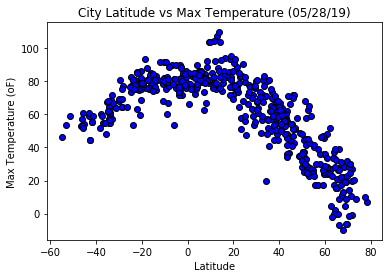

This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.
The data shows that the temperature increases in proximity to the equator.


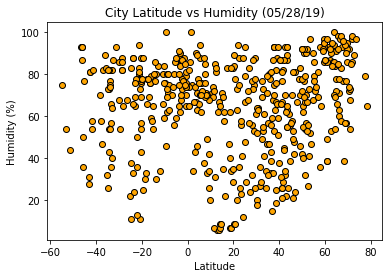

This Scatter Plot is determining the relationship between the humidity in a city and its latitude.
There does not appear to be a correlation between the humidity and latitude of a city.


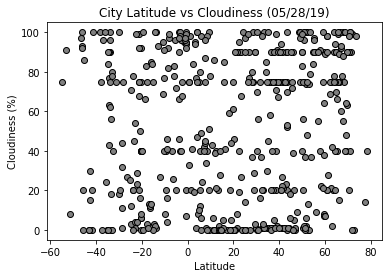

This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.
There does not appear to be a correlation between the cloudiness and latitude of a city.


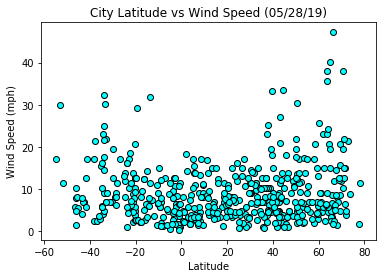

This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.
There does not appear to be a correlation between the wind speed and latitude of a city.


In [8]:
#Create Scatter Plots

#Temperature(oF) vs Latitude
temp_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Max Temp'], c="blue", edgecolors="black")
plt.title("City Latitude vs Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (oF)")
#Export/Save the Plot to a PNG File
#Method Found on https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
plt.savefig("../Pictures/Temperature vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.")
print("The data shows that the temperature increases in proximity to the equator.")

#Humidity% vs Latitude
humid_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Humidity'], c="orange", edgecolors="black")
plt.title("City Latitude vs Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#Export/Save the Plot to a PNG File
plt.savefig("../Pictures/Humidity vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the humidity in a city and its latitude.")
print("There does not appear to be a correlation between the humidity and latitude of a city.")

#Cloudiness vs Latitude
cloud_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Cloudiness'], c="gray", edgecolors="black")
plt.title("City Latitude vs Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#Export/Save the Plot to a PNG File
plt.savefig("../Pictures/Cloudiness vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.")
print("There does not appear to be a correlation between the cloudiness and latitude of a city.")

#Wind Speed vs Latitude
wind_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Wind Speed'], c="cyan", edgecolors="black")
plt.title("City Latitude vs Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Export/Save the Plot to a PNG File
plt.savefig("../Pictures/Wind Speed vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.")
print("There does not appear to be a correlation between the wind speed and latitude of a city.")

In [9]:
#Create DataFrames for Northern & Southern Hemispheres
north_df = weather_output_df.loc[weather_output_df['Lat']>=0]
north_df = north_df.reset_index(drop=True)

south_df = weather_output_df.loc[weather_output_df['Lat']<0]
south_df = south_df.reset_index(drop=True)

#Print the Northern Hemisphere DataFrame
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Cristobal,75,VE,1586195081,70,7.77,-72.22,84.2,9.17
1,Albany,75,US,1586194919,32,42.6,-73.97,57.99,4.7
2,Forssa,98,FI,1586195081,49,60.81,23.62,48.2,6.93
3,Yellowknife,75,CA,1586195081,53,62.46,-114.35,27,14.99
4,Vuktyl,78,RU,1586195082,94,63.86,57.31,17.22,4.54
...,...,...,...,...,...,...,...,...,...
338,Saint Anthony,90,US,1586195191,57,45.02,-93.22,54,10.29
339,Takoradze,10,GH,1586195176,76,4.88,-1.76,83.91,10.38
340,Deputatsky,64,RU,1586195192,90,69.3,139.9,9.09,8.52
341,Taraclia,0,MD,1586195192,49,45.9,28.67,47.1,7.23


In [10]:
#Print the Southern Hemisphere DataFrame
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1586195081,75,-54.8,-68.3,46.4,17.22
1,Port Alfred,56,ZA,1586195082,66,-33.59,26.89,64.63,30.09
2,Ballina,44,AU,1586195083,82,-28.87,153.57,64.4,8.05
3,Puerto Ayora,20,EC,1586195083,70,-0.74,-90.35,86,11.41
4,Bambous Virieux,40,MU,1586195083,78,-20.34,57.76,79,12.75
...,...,...,...,...,...,...,...,...,...
153,Manyana,45,BW,1586195189,24,-23.4,21.72,75.16,4.34
154,Cap Malheureux,40,MU,1586195189,78,-19.98,57.61,79,12.75
155,Kendari,97,ID,1586195191,91,-3.94,122.5,76.37,1.77
156,Carutapera,97,BR,1586195192,75,-1.2,-46.02,84.42,10.85


The R-Squared value is: 0.7817920108829667


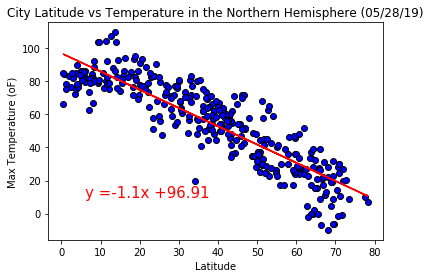

This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a strong negative correlation between the max temperature and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.5803852680714376


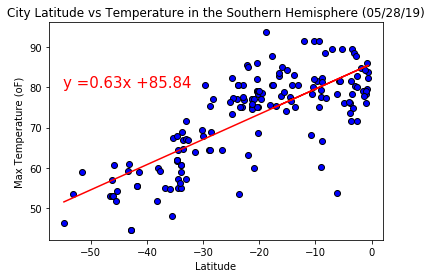

This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the max temperature and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [11]:
#Run Linear Regression Analysis for Temperature vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Max Temp'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_temp_plot = plt.scatter(north_df['Lat'], north_df['Max Temp'], color="blue", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (6, 10), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Temperature in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (oF)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Northern Temperature vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a strong negative correlation between the max temperature and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Max Temp'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Max Temp'], color="blue", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-55, 80), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Temperature in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (oF)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Southern Temperature vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the max temperature and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

The R-Squared value is: 0.08480316818300282


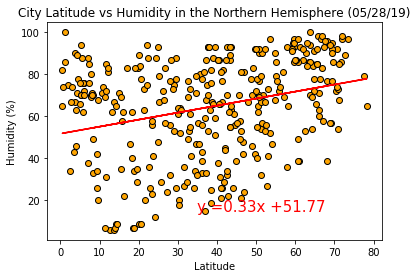

This Scatter Plot is determining the relationship between the humidity in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existant positive correlation between the humidity and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.03215157393152183


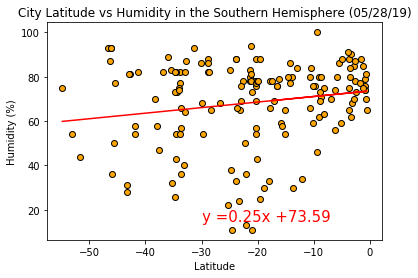

This Scatter Plot is determining the relationship between the humidity in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the humidity and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [12]:
#Run Linear Regression Analysis for Humidity vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Humidity'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_humid_plot = plt.scatter(north_df['Lat'], north_df['Humidity'], color="orange", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (35, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Humidity in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Northern Humidity vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the humidity in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existant positive correlation between the humidity and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Humidity'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Humidity'], color="orange", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-30, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Humidity in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Southern Humidity vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the humidity in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the humidity and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

The R-Squared value is: 0.045553343114752634


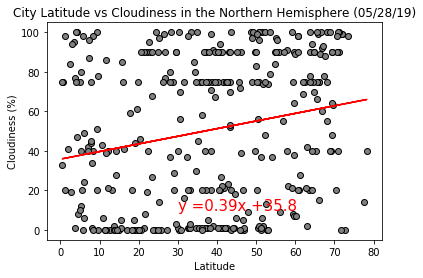

This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.027735101901179653


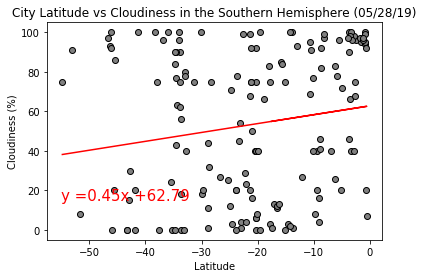

This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [13]:
#Run Linear Regression Analysis for Cloudiness vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Cloudiness'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_cloud_plot = plt.scatter(north_df['Lat'], north_df['Cloudiness'], color="gray", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (30, 10), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Cloudiness in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Northern Cloudiness vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Cloudiness'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Cloudiness'], color="gray", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-55, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Cloudiness in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Southern Cloudiness vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

The R-Squared value is: 0.05120992797519945


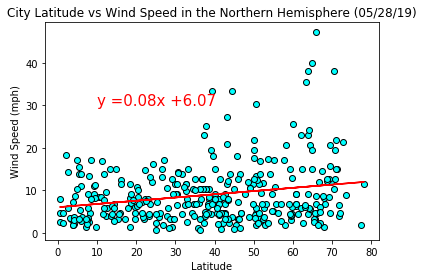

This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.09338733217360118


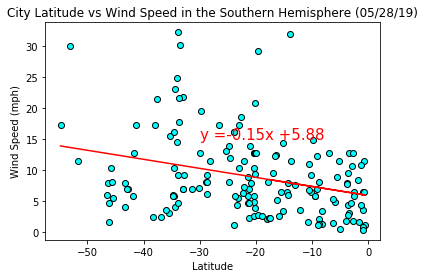

This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [14]:
#Run Linear Regression Analysis for Cloudiness vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Wind Speed'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_cloud_plot = plt.scatter(north_df['Lat'], north_df['Wind Speed'], color="cyan", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (10, 30), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Northern Wind Speed vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Wind Speed'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Wind Speed'], color="cyan", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-30, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Export the Results to a PNG File
plt.savefig("../Pictures/Southern Wind Speed vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

In [15]:
#Conclusions
print("Conclusions")
print("-------------------------------------------------------------------------------------------------------------------")
print("1. The latitude is only a good predictor of temperature. It is not a good predictor of humidity, cloudiness, or wind speed.")
print("-------------------------------------------------------------------------------------------------------------------")
print("2. The wind speeds seem to pick up at the very highest latitude values in the Northern Hemisphere, suggesting that perhaps  arctic winds contribute to the wind speed.")
print("-------------------------------------------------------------------------------------------------------------------")
print("3. There are fewer data points, with data not collected as far south in the Southern Hemisphere as it is far north in the   Northern Hemisphere. As such, the conclusions for the Southern Hemisphere are not as strong as the conclusions for the      Northern Hemisphere.")

Conclusions
-------------------------------------------------------------------------------------------------------------------
1. The latitude is only a good predictor of temperature. It is not a good predictor of humidity, cloudiness, or wind speed.
-------------------------------------------------------------------------------------------------------------------
2. The wind speeds seem to pick up at the very highest latitude values in the Northern Hemisphere, suggesting that perhaps  arctic winds contribute to the wind speed.
-------------------------------------------------------------------------------------------------------------------
3. There are fewer data points, with data not collected as far south in the Southern Hemisphere as it is far north in the   Northern Hemisphere. As such, the conclusions for the Southern Hemisphere are not as strong as the conclusions for the      Northern Hemisphere.
